In [0]:
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
chrun_master_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")

In [0]:
df = chrun_master_df.copy()

In [0]:
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [0]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [0]:
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])
print("\nFeatures:",df.columns.tolist())
print("\nMissing Values:\n",df.isnull().sum())
print("\nUnique Value:\n",df.nunique())

Rows: 7043
Columns: 10

Features: ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values:
 customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

Unique Value:
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [0]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [0]:
df[df["tenure"]==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [0]:
df["TotalCharges"].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [0]:
df[df["Churn"]=="No"].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


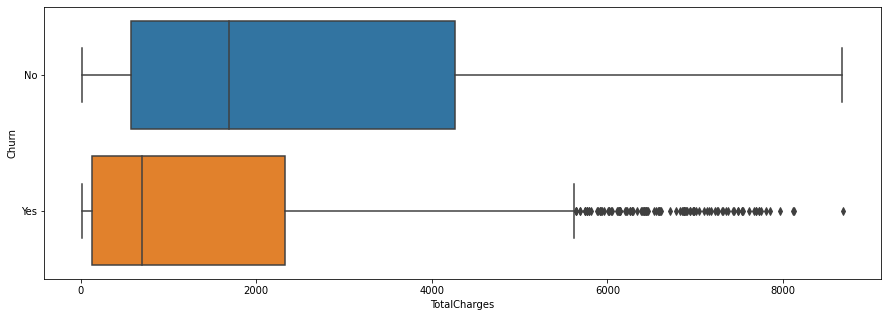

In [0]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges",y="Churn",data=df)

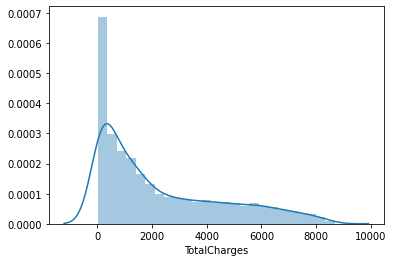

In [0]:
sns.distplot(df["TotalCharges"])

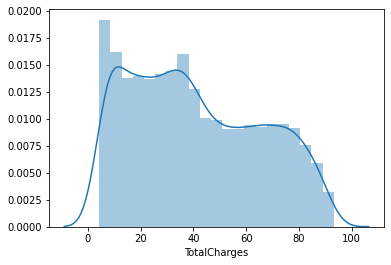

In [0]:
sns.distplot(df["TotalCharges"].apply(np.sqrt))

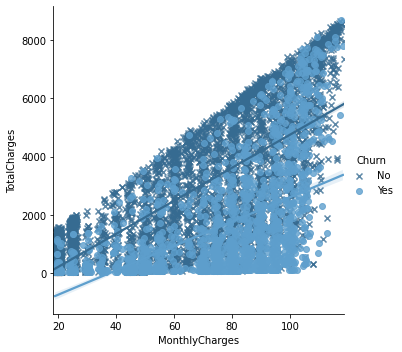

In [0]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",data=df,fit_reg=True,hue="Churn",markers=["x","o"],palette="Blues_d")

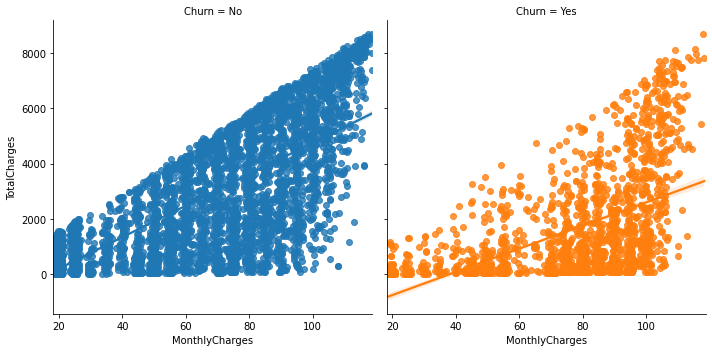

In [0]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",data=df,fit_reg=True,col="Churn",hue="Churn")

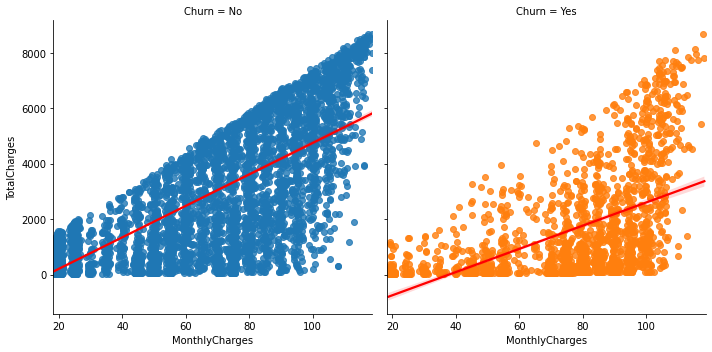

In [0]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",data=df,fit_reg=True,col="Churn",hue="Churn",line_kws={'color':'red'})

In [0]:
df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [0]:
df[df["Churn"]=="No"][['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [0]:
no_df = df[(df["Churn"]=='No') & (df['TotalCharges'].isna()==False)]
no_df.shape[0]

5147

In [0]:
no_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
tenure              0
ServiceCount        0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
from scipy import stats
slope,intercept,r_value,p_value,std_err = stats.linregress(no_df['MonthlyCharges'],no_df['TotalCharges'])

print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  56.73637552696062
intercept  :  -922.8160085118097
r_value :   0.7573902887184033
p_value :   0.0
std_err :   0.6819261867835148
R-squared:  0.5736400494449463


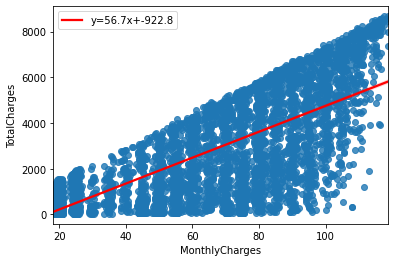

In [0]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

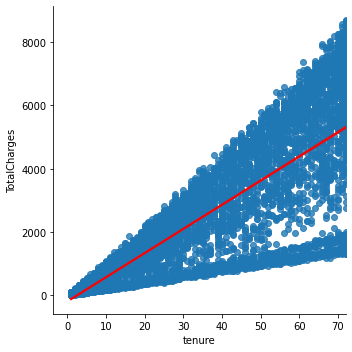

In [0]:
sns.lmplot(x='tenure',y='TotalCharges',data=df,fit_reg=True, line_kws={'color':'red'})

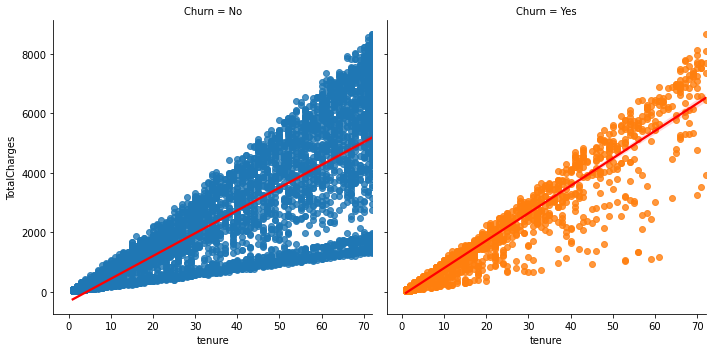

In [0]:
sns.lmplot(x='tenure',y='TotalCharges',data=df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'})

In [0]:
df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [0]:
df[df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [0]:
slope, intercept, r_value, p_value, std_err=stats.linregress(no_df['tenure'],no_df['TotalCharges'])

In [0]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  76.74259761920021
intercept  :  -334.08560506046933
r_value :   0.793287728023258
p_value :   0.0
std_err :   0.8211475250987232
R-squared:  0.6293054194323026


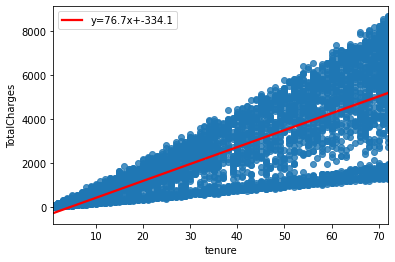

In [0]:
ax=sns.regplot(x='tenure', y='TotalCharges', data=no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

In [0]:
no_df['tenure_charges']=no_df['tenure']*no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [0]:
no_df[no_df['Churn']=='No'][['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


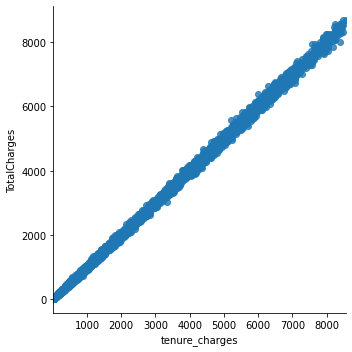

In [0]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=no_df)

In [0]:
slope, intercept, r_value, p_value, std_err=stats.linregress(no_df['tenure_charges'],no_df['TotalCharges'])
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

intercept  :  -0.3010983695039613
r_value :   0.9995350350972924
p_value :   0.0
std_err :   0.00042536192429779864
R-squared:  0.9990702863869455


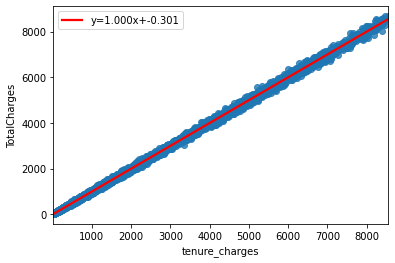

In [0]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=no_df, line_kws={'color':'red','label':'y={0:.3f}x+{1:.3f}'.format(slope,intercept)})
ax.legend(loc="best")

In [0]:
def fillna(tenure, monthlycharge):
  if tenure == 0 :
    totcharges = monthlycharge
  else :
    totcharges = tenure * monthlycharge
    totcharges = intercept+(totcharges*slope)
  return round(totcharges,2)

In [0]:
df['TotChargeNew'] = df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']), axis=1)

In [0]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96


In [0]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')

In [0]:
churn_merged=pd.merge(df, churn_actual_df)

In [0]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96,279.2


In [0]:
import pandas as pd
df = pd.read_csv('data.csv')

In [6]:
df.columns

Index(['ID', 'Sl No', 'Treatment ', 'Genotype', 'Plant No', 'Cl', '3997.363',
       '3995.302', '3993.24', '3991.179',
       ...
       '418.4966', '416.4351', '414.3733', '412.3118', '410.2502', '408.1887',
       '406.1272', '404.0657', '402.0042', '399.9424'],
      dtype='object', length=1752)

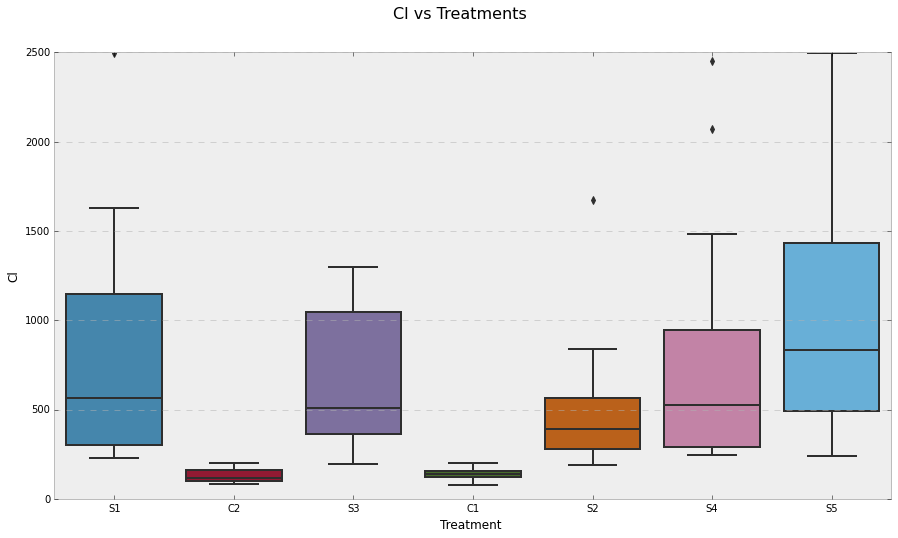

In [97]:
import seaborn as sns  
import matplotlib.pyplot as plt  

fig, ax = plt.subplots(figsize=(15, 8))  
fig.suptitle("Cl vs Treatments", fontsize=16)
sns.boxplot(x='Treatment ', y='Cl', data=df ,ax=ax)  
ax.set_ylim([0,2500])
#ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.savefig("Cl_vs_treatmen.png")
plt.show() 

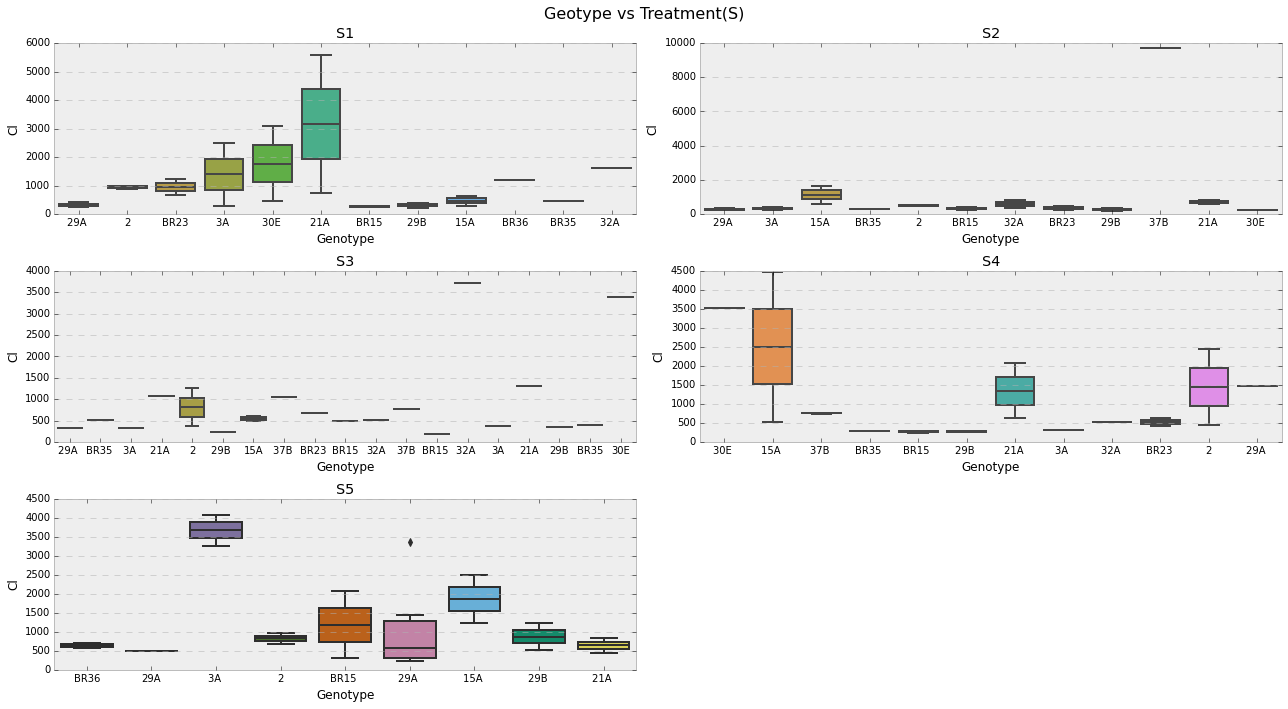

In [94]:
S1 =  df[df['Treatment '].str.contains("S1")]
S2 =  df[df['Treatment '].str.contains("S2")]
S3 =  df[df['Treatment '].str.contains("S3")]
S4 =  df[df['Treatment '].str.contains("S4")]
S5 =  df[df['Treatment '].str.contains("S5")]
S6 =  df[df['Treatment '].str.contains("S6")]
f, axes = plt.subplots(3, 2,figsize=(18,10))
f.suptitle("Geotype vs Treatment(S)", fontsize=16)
sns.boxplot(x='Genotype', y='Cl', data=S1 ,ax=axes[0][0]) 
axes[0][0].set_title("S1")
sns.boxplot(x='Genotype', y='Cl', data=S2 ,ax=axes[0][1])
axes[0][1].set_title("S2") 
sns.boxplot(x='Genotype', y='Cl', data=S3 ,ax=axes[1][0]) 
axes[1][0].set_title("S3")
sns.boxplot(x='Genotype', y='Cl', data=S4 ,ax=axes[1][1]) 
axes[1][1].set_title("S4")
sns.boxplot(x='Genotype', y='Cl', data=S5 ,ax=axes[2][0])
axes[2][0].set_title("S5") 
#sns.boxplot(x='Genotype', y='Cl', data=S6 ,ax=axes[2][1]) 
f.delaxes(axes[2,1])
plt.tight_layout()
f.subplots_adjust(top=0.93)
plt.savefig('S_genotype.png')
plt.show()
